1. Based on the mean and median values of the average tumors, Capomulin and Ramicane were the only drugs that consistently reduced the size of the tumors in the mice.
2. With the relative lack of outliers shown in the box and whisker plot, it seems like even with this small sample size, the results were consistent and can be safely used for future projections.
3. The high correlation coefficient between mouse weight and tumor volume suggests a strong relation between those two variables. Future studies could determine whether changes to the drug regimen could better benefit the larger mice.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "./mouse_metadata.csv"
study_results_path = "./study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_data = pd.merge(mouse_metadata,study_results)
# find duplicate values
combined_data[combined_data.duplicated()]
# duplicate mouse id is g989
combined_data = combined_data.drop(combined_data[combined_data["Mouse ID"] == "g989"].index)

grouped_data = combined_data.groupby(["Drug Regimen"])
summary_table = pd.DataFrame({"Mean":grouped_data.mean()["Tumor Volume (mm3)"],
                             "Median":grouped_data.median()["Tumor Volume (mm3)"],
                             "Variance":grouped_data.var()["Tumor Volume (mm3)"],
                              "Standard Deviation":grouped_data.std()["Tumor Volume (mm3)"],
                             "Standard Error":grouped_data.sem()["Tumor Volume (mm3)"]})
summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


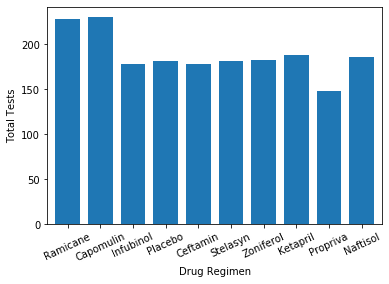

In [2]:
# dataframe.plot bar chart
grouped = combined_data.drop_duplicates(["Mouse ID"])
x_variable = combined_data["Drug Regimen"].unique()
y_variable = grouped_data["Mouse ID"].count()
y_data=[]
for x in x_variable:
    y_data = y_data + [y_variable[x]]
    
new_grouped = combined_data.drop_duplicates(["Drug Regimen"])
thing = grouped.groupby(["Drug Regimen"])
thing["Drug Regimen"].count()
bar_df = pd.DataFrame({"Drug Regimen":grouped["Drug Regimen"].unique(),
                      "Total Tests":y_data})

ax = bar_df.plot.bar(x="Drug Regimen",y="Total Tests",width=.75,legend=None)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Total Tests")
ax.set_xticklabels(labels = grouped["Drug Regimen"].unique(),rotation=25)
ax

<IPython.core.display.Javascript object>


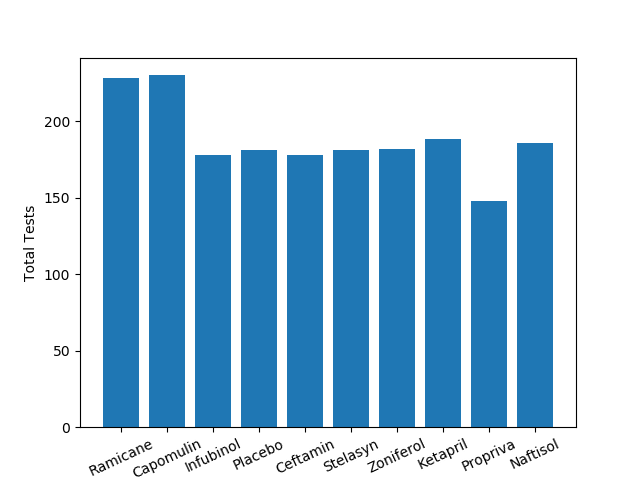

In [3]:
# matplotlib pyplot bar chart
%matplotlib notebook
plt.close()
plt.bar(x_variable, y_data,align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Tests")
plt.xticks(rotation=25)
plt.show()

<IPython.core.display.Javascript object>


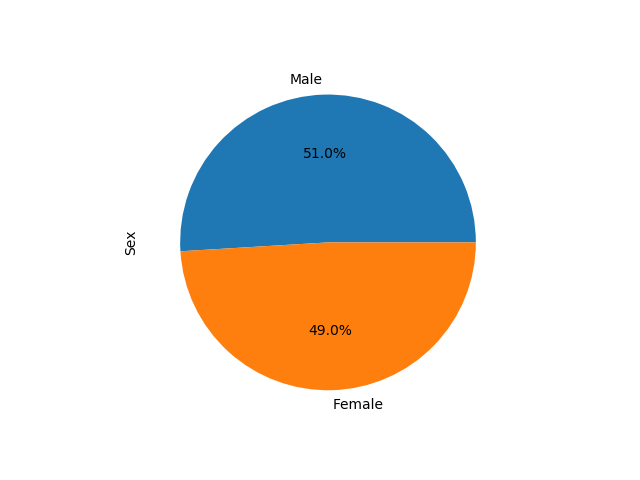

In [4]:
# pandas pie chart
plt.close()
gender_data = combined_data["Sex"].value_counts()
new_ax = gender_data.plot.pie(y="Sex",autopct="%1.1f%%")
plt.show()

<IPython.core.display.Javascript object>


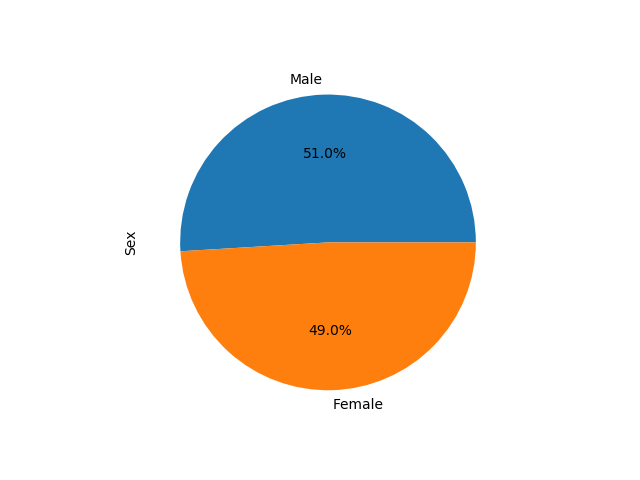

In [5]:
# matplotlib bar chart
%matplotlib notebook
plt.close()
labels = "Male", "Female"
plt.pie(gender_data,labels=labels,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


In [6]:
# final tumor volume data
sorted_combined_data = combined_data.sort_values(["Timepoint"],ascending=False)
new_combined_data = sorted_combined_data.drop_duplicates(["Mouse ID"],keep="first")

capomulin_data = new_combined_data.loc[(new_combined_data["Drug Regimen"] == "Capomulin")]
ramicane_data = new_combined_data.loc[(new_combined_data["Drug Regimen"] == "Ramicane")]
infubinol_data = new_combined_data.loc[(new_combined_data["Drug Regimen"] == "Infubinol")]
ceftamin_data = new_combined_data.loc[(new_combined_data["Drug Regimen"] == "Ceftamin")]

capomulin_tumor = capomulin_data["Tumor Volume (mm3)"]
ramicane_tumor = ramicane_data["Tumor Volume (mm3)"]
infubinol_tumor = infubinol_data["Tumor Volume (mm3)"]
ceftamin_tumor = ceftamin_data["Tumor Volume (mm3)"]

cap_iqr = np.percentile(capomulin_tumor,75) - np.percentile(capomulin_tumor,25)
ram_iqr = np.percentile(ramicane_tumor,75) - np.percentile(ramicane_tumor,25)
inf_iqr = np.percentile(infubinol_tumor,75) - np.percentile(infubinol_tumor,25)
cef_iqr = np.percentile(ceftamin_tumor,75) - np.percentile(ceftamin_tumor,25)

# capomulin outliers
cap_low = np.percentile(capomulin_tumor,25) - (1.5 * cap_iqr)
cap_upp = np.percentile(capomulin_tumor,75) + (1.5 * cap_iqr)
cap_outliers = []
for x in capomulin_tumor:
    if x <= cap_low:
        cap_outliers.append(x)
    if x >= cap_upp:
        cap_outliers.append(x)
print(f"Capomulin has outliers of {cap_outliers}.")

# ramicane outliers
ram_low = np.percentile(ramicane_tumor,25) - (1.5 * ram_iqr)
ram_upp = np.percentile(ramicane_tumor,75) + (1.5 * ram_iqr)
ram_outliers = []
for x in ramicane_tumor:
    if x <= ram_low:
        ram_outliers.append(x)
    if x >= ram_upp:
        ram_outliers.append(x)
print(f"Ramicane has outliers of {ram_outliers}.")

# infubinol outliers
inf_low = np.percentile(infubinol_tumor,25) - (1.5 * inf_iqr)
inf_upp = np.percentile(infubinol_tumor,75) + (1.5 * inf_iqr)
inf_outliers = []
for x in infubinol_tumor:
    if x <= inf_low:
        inf_outliers.append(x)
    if x >= inf_upp:
        inf_outliers.append(x)
print(f"Infubinol has outliers of {inf_outliers}.")

# ceftamin outliers
cef_low = np.percentile(ceftamin_tumor,25) - (1.5 * cef_iqr)
cef_upp = np.percentile(ceftamin_tumor,75) + (1.5 * cef_iqr)
cef_outliers = []
for x in ceftamin_tumor:
    if x <= cef_low:
        cef_outliers.append(x)
    if x >= cef_upp:
        cef_outliers.append(x)
print(f"Ceftamin has outliers of {cef_outliers}.")

Capomulin has outliers of [].
Ramicane has outliers of [].
Infubinol has outliers of [36.321345799999996].
Ceftamin has outliers of [].


<IPython.core.display.Javascript object>


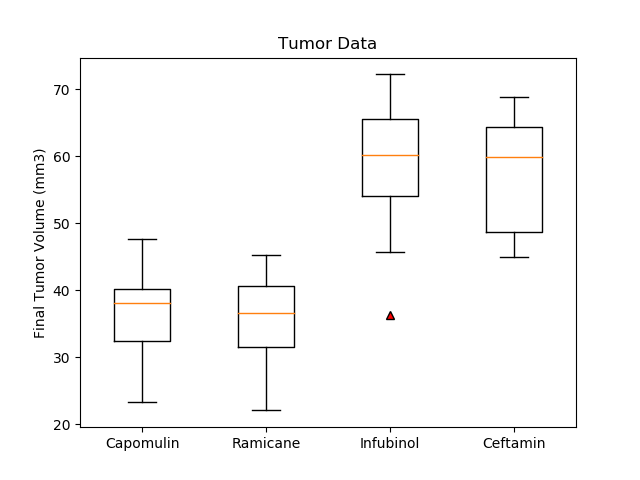

In [7]:
# box and whisker plots
data = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]
x_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig5, ax5 = plt.subplots()
ax5.boxplot(data,labels = x_labels,flierprops=dict(markerfacecolor="r",marker="^"))
plt.title("Tumor Data")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

<IPython.core.display.Javascript object>


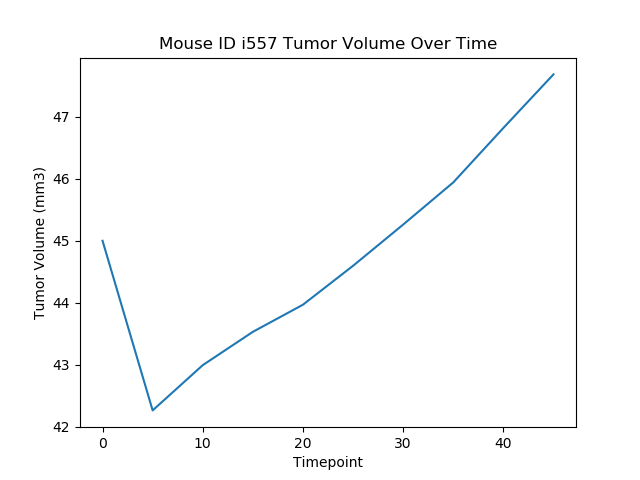

In [8]:
# line plot for a capomulin-tested mouse (mouse id i557)
mouse_i557 = combined_data.loc[combined_data["Mouse ID"] == "i557"]
mouse_i557_y_data = mouse_i557["Tumor Volume (mm3)"]
mouse_i557_x_data = mouse_i557["Timepoint"]

fig6, ax6 = plt.subplots()
ax6.plot(mouse_i557_x_data,mouse_i557_y_data)
plt.title("Mouse ID i557 Tumor Volume Over Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

<IPython.core.display.Javascript object>


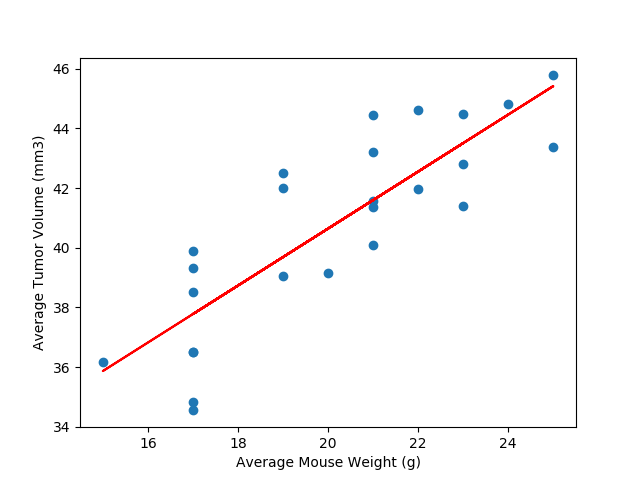

In [9]:
# scatter plot of mouse weight vs average tumor volume for all Capomulin-tested mice
cap_scatter_data = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
grouped_cap_scatter_data = cap_scatter_data.groupby(["Mouse ID"]).mean()
cap_scatter_weight_data = grouped_cap_scatter_data["Weight (g)"]
cap_scatter_tumor_data = grouped_cap_scatter_data["Tumor Volume (mm3)"]
fig7, ax7 = plt.subplots()
ax7.scatter(cap_scatter_weight_data, cap_scatter_tumor_data)
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [10]:
# linear regression and add fit line on scatter plot
(slope,intercept,_,_,_) = st.linregress(cap_scatter_weight_data, cap_scatter_tumor_data)
fit = slope * cap_scatter_weight_data + intercept
ax7.plot(cap_scatter_weight_data, fit, "r")
print(f"The correlation coefficient between mouse weight and tumor volume is {round(cap_scatter_weight_data.corr(cap_scatter_tumor_data),3)}.")

The correlation coefficient between mouse weight and tumor volume is 0.842.
